Load the data as a Pandas data frame and ensure that it imported correctly.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Loading the data into dataframe.
auto_df = pd.read_csv('Data/auto-mpg.csv')

# Checking if the data is loaded to dataframe.
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Begin by prepping the data for modeling:
Remove the car name column.
The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
Create dummy variables for the origin column.

In [11]:
# Removing the 'car name' column.
auto_df = auto_df.drop(columns=['car name'])

In [25]:
# Checking the values of horsepower column.
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104.47, '100', '105', '175', '153', '180',
       '110', '72', '86', '70', '76', '65', '69', '60', '80', '54', '208',
       '155', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Explanation: The horsepower is string datatype because of '?' value.

In [24]:
# Replacing the '?' value in horsepower column with mean value.
auto_df.horsepower.loc[(auto_df.horsepower == '?')] = round(auto_df.loc[auto_df.horsepower != '?'].astype('float').horsepower.mean(),2)


In [28]:
# Creating dummy variables for origin column.
pd.get_dummies(auto_df.origin,'origin','_')

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

<AxesSubplot:>

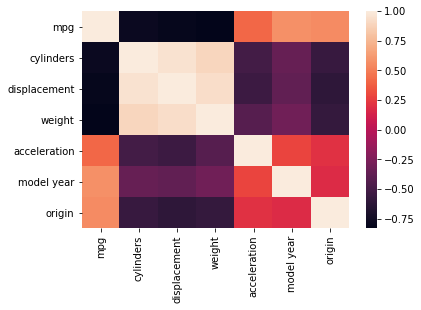

In [36]:
# Creating correlation matrix.
corr_mat = auto_df.corr()

# Plotting correlation matrix.
sb.heatmap(corr_mat)

accelaration, model year, orgin have some positive correlation with mpg.

Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

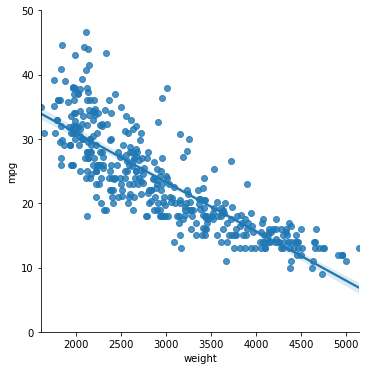

In [41]:
# Plotting mpg vs weight.
plot = sb.lmplot('weight','mpg',data=auto_df)
plot.set(ylim = (0,50))

Scatter plot distribution shows that mpg is negatively correlated with weight. Lower the mpg higher the weight.

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [45]:
# Choosing the Predictor columns.
X = auto_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', "origin"]]

# Choosing the target column.
y = auto_df['mpg']

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

Train an ordinary linear regression on the training data.

In [46]:
# Training a simple linear regression model on training data.
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [60]:
# Calculating R2, RMSE and MAE on the training set.
preds = regr.predict(X_train)

r2 = metrics.r2_score(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train,preds))
mae = metrics.mean_absolute_error(y_train, preds)

print("Training set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

# Calculating R2, RMSE and MAE on the testing set.
preds = regr.predict(X_test)

r2 = metrics.r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test,preds))
mae = metrics.mean_absolute_error(y_test, preds)

print("\nTesting set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

Training set: 
 R2: 0.8149 
 RMSE: 3.4329 
 Mean Absolute Error: 2.6230

Testing set: 
 R2: 0.8405 
 RMSE: 2.8229 
 Mean Absolute Error: 2.1532


For training and testing set:
R-square is 0.8, it means 80% of the variation in the output variables. 
RMSE, MAE values are higher, which indicates that the model prediction accuracy is not very high.

Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [62]:
# Importing random forest regression
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

preds = reg.predict(X_train)
# Calculating R2, RMSE and MAE on the training set.
r2 = metrics.r2_score(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train,preds))
mae = metrics.mean_absolute_error(y_train, preds)
print("Training set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

preds = reg.predict(X_test)
# Calculating R2, RMSE and MAE on the testing set.
r2 = metrics.r2_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test,preds))
mae = metrics.mean_absolute_error(y_test, preds)

print("\nTesting set: \n R2: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (r2,rmse,mae))

Training set: 
 R2: 0.9841 
 RMSE: 1.0064 
 Mean Absolute Error: 0.7062

Testing set: 
 R2: 0.8239 
 RMSE: 2.9663 
 Mean Absolute Error: 1.9377


Using random forest regression: 
For training, R-square is 0.9, it means 90% of the variation in the output variables. 
For testing, R-square is 0.8, it means 80% of the variation in the output variables. 

RMSE, MAE are lower in comparision to Linear regression for Training data, but the testing data are worse than train data.